In [74]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
data = pd.read_csv("./spam.csv",encoding='latin-1')
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.loc[data['v1']=='spam','v1']=1
data.loc[data['v1']=='ham','v1']=0

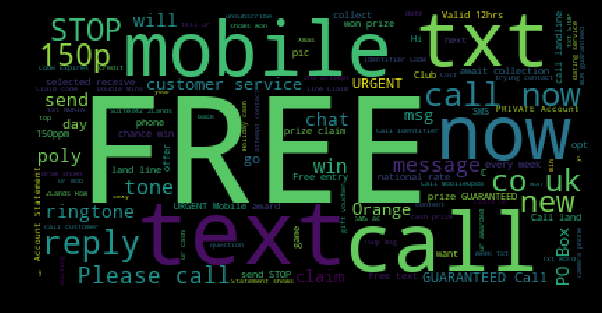

In [10]:
spam_words = ' '.join(list(data[data['v1']==1]['v2']))
x = WordCloud().generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.axis('off')
plt.imshow(x)

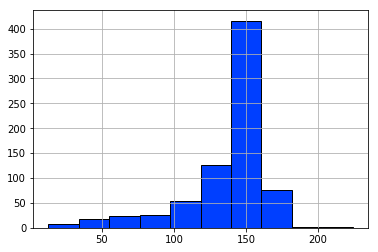

In [46]:
data['legnth'] = data['v2'].apply(len)
data.loc[data['v1']==1,'legnth'].hist()


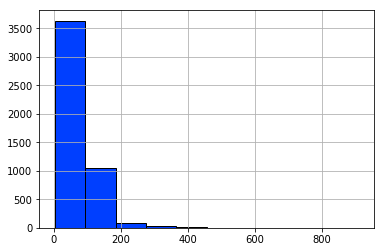

In [47]:
data.loc[data['v1']==0,'legnth'].hist()

In [59]:
messages = data['v2'].copy()
def process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    test = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    return ''.join(text)
messages.apply(process)


0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: v2, Length: 5572, dtype: object

In [66]:
vec = TfidfVectorizer('english')
features = vec.fit_transform(messages)

In [104]:
X,Y,X_label,Y_label= train_test_split(features,data['v1'])
X_label = X_label.astype('int')
Y_label = Y_label.astype('int')

In [105]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X,X_label)
pred = pd.Series(mnb.predict(Y))
accuracy_score(pred,Y_label)

0.9827709978463748